<a href="https://colab.research.google.com/github/LeanyBM/Probabilidad-y-Estadistica/blob/main/Practica_final_Unidad5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


#**PROBABILIDAD Y ESTADÍSTICA**

##Unidad 5.

###*Practica Final.  Regresión lineal y correlación*

####Profesor: Dr. José Gabriel Rodriguez Rivas

####Alumna: Leany Blanco Muñoz
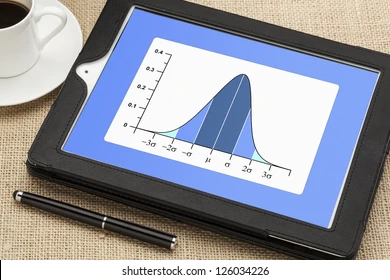


---



In [47]:
#Importo las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import numpy as np




---


### **GRUPO 1**




*   ### Carga y Exploración de Datos:




In [48]:
#Cargar los datos del grupo 1 y mostrar las primeras 5 filas
df1 = pd.read_csv('grupo1.csv')
df1.head(6)

,HorasEstudio,Calificacion
0,20.00,75.94
1,15.60,87.48
2,17.91,79.40
3,20.00,73.37
4,20.00,83.75
5,10.09,87.85


In [49]:
#Exploración inicial de los datos (descripción estadística)
df1.describe()

,HorasEstudio,Calificacion
count,50.000000,50.00000
mean,14.352000,83.78820
std,4.219174,7.83389
min,3.790000,68.46000
25%,12.032500,78.03500
50%,14.600000,84.49000
75%,17.715000,88.09000
max,20.000000,100.00000


In [50]:
#Información del DataFrame del Grupo 1:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HorasEstudio  50 non-null     float64
 1   Calificacion  50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes


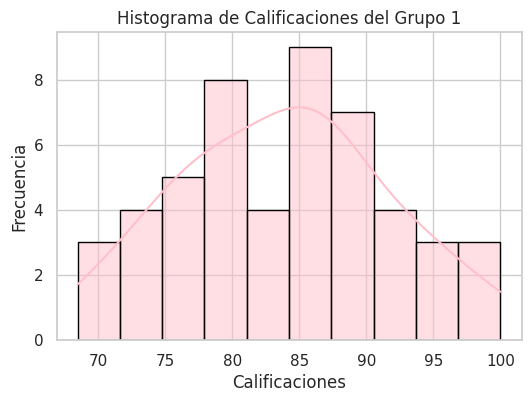

In [51]:
# Histograma Grupo 1
plt.figure(figsize=(6, 4))
sns.histplot(df1['Calificacion'], bins=10, kde=True, color='pink', edgecolor='black')
plt.title('Histograma de Calificaciones del Grupo 1')
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


*   ### Modelo de Regresión Lineal:




In [52]:
# Crear el objeto de regresión lineal
lr=LinearRegression()

In [53]:
#  Entrenamiento del modelo de regresión lineal simple
#Variable independiente o variable predictora
x = df1[["HorasEstudio"]]

# Variable dependiente o variable objetivo a predecir
y=df1["Calificacion"]
x.head(6)

,HorasEstudio
0,20.00
1,15.60
2,17.91
3,20.00
4,20.00
5,10.09


In [54]:
#Fase de entrenamiento de modelo lineal lr METODO FIT
lr.fit(x, y)

LinearRegression()

In [55]:
#Fase de predicción
Ypredict=lr.predict(x)

In [56]:
 # Valor del intercepto
intercepto =lr.intercept_

In [57]:
# Valor del coeficiente (pendiente de la recta)
pendiente =lr.coef_

In [58]:
print("Modelo de Regresión Lineal:")
print(f"Intercepto (b):", intercepto)
print(f"Pendiente (m): ",pendiente)
print(f"Ecuación de la línea de regresión: Calificacion = ",intercepto ,"+", pendiente," * HorasEstudio")

Modelo de Regresión Lineal:
Intercepto (b): 85.31068185245395
Pendiente (m):  [-0.10608151]
Ecuación de la línea de regresión: Calificacion =  85.31068185245395 + [-0.10608151]  * HorasEstudio


In [59]:
#Coeficiente de determinación R²
lr.score(x,y)

0.003264219049924466

*   ### Visualización de Resultados:

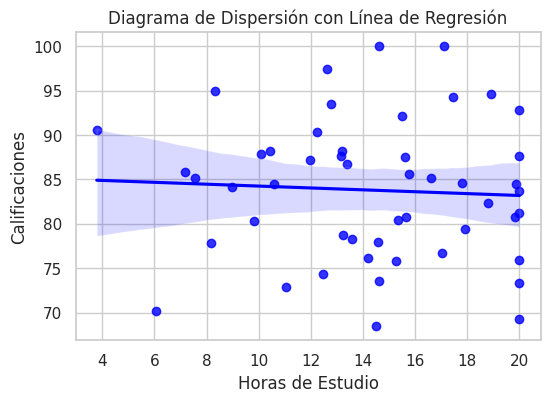

In [60]:
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.regplot(x=x, y=y, scatter=True, color='blue')
plt.title('Diagrama de Dispersión con Línea de Regresión')
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificaciones')
plt.grid(True)
plt.show()                                   # Mostrar gráfica

Valor de la pendiente: -0.10608151145860807
Valor de la intercepcion: 85.31068185245395


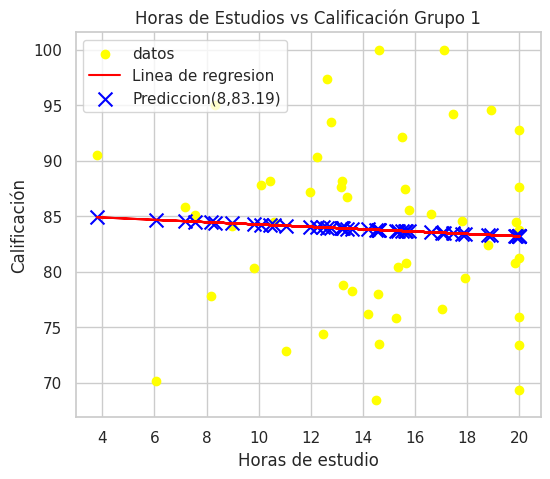

In [61]:
print("Valor de la pendiente:", lr.coef_[0])
print("Valor de la intercepcion:", lr.intercept_)

plt.figure(figsize=(6,5))
plt.scatter(x, y, color='yellow', label='datos')
plt.plot(x, lr.predict(x), color='red', label='Linea de regresion')
plt.scatter(x, Ypredict, color='blue', marker='x', s=100,
            label='Prediccion(8,{0:.2f})'.format(Ypredict[0]))
plt.title('Horas de Estudios vs Calificación Grupo 1')
plt.xlabel('Horas de estudio')
plt.ylabel('Calificación')
plt.legend()
plt.grid(True)
plt.show()

*   ### Cálculo de la Correlación:


In [62]:
#coeficiente de correlación Pearson
from scipy.stats import pearsonr
coeficiente_correlacion, p_valor = pearsonr(df1['HorasEstudio'], df1['Calificacion'])

print("Coeficiente de correlacion de Pearson:", coeficiente_correlacion)
print("Valor p:", p_valor)

Coeficiente de correlacion de Pearson: -0.05713334446646933
Valor p: 0.6935088469237538




---



---


## Interpretación de Resultados del Grupo 1:
Analizar los resultados obtenidos en base al diagrama de dispersión la línea de regresión y el coeficiente de correlación. Contestar las siguientes preguntas


 * **1. ¿Explicar cuál es la interpretación del coeficiente de regresión en términos de la
relación entre el tiempo de estudio y las calificaciones finales?**
> Este coeficiente describe cómo cambia la variable dependiente (calificaciones finales) en relación con la variable independiente (horas de estudio). En el diagrama, la línea de regresión muestra una pendiente ligeramente negativa, lo que sugiere que, en promedio, un aumento en las horas de estudio podría estar asociado con una ligera disminución en las calificaciones. Sin embargo, como la pendiente es muy pequeña, la relación es débil.Es decir que el tiempo de estudio no predice al cien porciento las calificaciones.


* **2. ¿Cómo se interpreta el coeficiente de correlación en términos de la fuerza y
dirección de la relación entre las variables?**


> Este coeficiente mide la fuerza y dirección de la relación entre las variables. En este caso, la pendiente negativa de la línea de regresión y la dispersión de los puntos sugieren que el coeficiente de correlación es cercano a cero, indicando una relación débil y negativa entre el tiempo de estudio y las calificaciones.




* **3. ¿El modelo de regresión lineal es estadísticamente significativo?**


>  Para evaluar si el modelo es estadísticamente significativo, se necesita el valor p asociado con el coeficiente de regresión. Si el valor p es menor que 0.05, el modelo se considera significativo. Sin embargo, dada la pequeña pendiente de la línea de regresión y la dispersión de los puntos, el modelo no es estadísticamente significativo.






* **4. ¿Qué tan confiable es el modelo de regresión para predecir las
calificaciones finales de los estudiantes basado en el tiempo de estudio?**

> La línea de regresión en la imagen muestra un ajuste débil a los datos, lo que sugiere que el modelo no es confiable para predecir las calificaciones únicamente basado en el tiempo de estudio.




---



---










---

### **GRUPO 2**







*   ### Carga y Exploración de Datos:




In [63]:
# Cargar los datos del grupo 2
df2 = pd.read_csv('grupo2.csv')
df2.head()

,HorasEstudio,Calificacion
0,3.79,40.0
1,6.08,26.1
2,7.17,29.0
3,7.54,31.9
4,8.18,34.8


In [64]:
#Exploración inicial de los datos (descripción estadística)
df2.describe()

,HorasEstudio,Calificacion
count,50.000000,50.000000
mean,14.352000,75.912000
std,4.219174,20.668922
min,3.790000,26.100000
25%,12.032500,63.500000
50%,14.600000,78.550000
75%,17.715000,93.300000
max,20.000000,99.000000


In [65]:
#Información del DataFrame del Grupo 2:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HorasEstudio  50 non-null     float64
 1   Calificacion  50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes


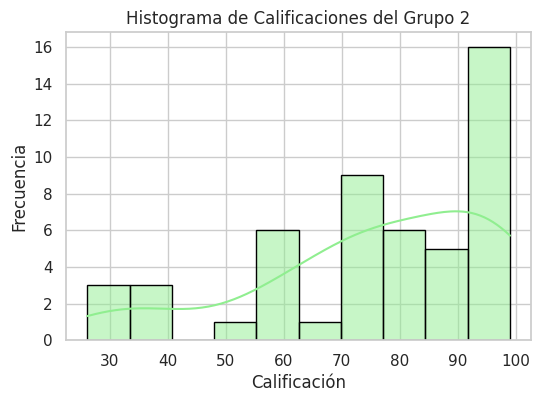

In [66]:
# Histograma Grupo 2
plt.figure(figsize=(6, 4))
sns.histplot(df2['Calificacion'], bins=10, kde=True, color='lightgreen',edgecolor='black')
plt.title('Histograma de Calificaciones del Grupo 2')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


*   ### Modelo de Regresión Lineal:




In [67]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
lr=LinearRegression()

In [68]:
#Variables independientes o variables predictoras
x = df2[["HorasEstudio"]]

#Variable dependiente o variable objetivo a predecir
y=df2["Calificacion"]
x.head(6)

,HorasEstudio
0,3.79
1,6.08
2,7.17
3,7.54
4,8.18
5,8.32


In [69]:
#Entrenar al algoritmo de regresion lineal
lr.fit(x,y)

LinearRegression()

In [70]:
#Realizamos la fase de predicción
Ypredict=lr.predict(x)

In [71]:
 # Valor del intercepto
intercepto =lr.intercept_

In [72]:
# Valor del coeficiente (pendiente de la recta)
pendiente =lr.coef_

In [73]:
print("Modelo de Regresión Lineal:")
print(f"Intercepto (b):", intercepto)
print(f"Pendiente (m): ",pendiente)
print(f"Ecuación de la línea de regresión: Calificacion = ",intercepto , "+",pendiente," * HorasEstudio")

Modelo de Regresión Lineal:
Intercepto (b): 15.30754188313253
Pendiente (m):  [4.22271865]
Ecuación de la línea de regresión: Calificacion =  15.30754188313253 + [4.22271865]  * HorasEstudio


In [74]:
#Coeficiente de determinación R²
lr.score(x,y)

0.7430251096495395

*   ### Visualización de Resultados:

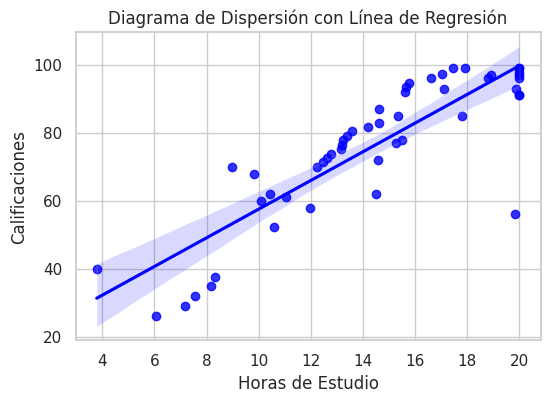

In [75]:
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.regplot(x=x, y=y, scatter=True, color='blue')
plt.title('Diagrama de Dispersión con Línea de Regresión')
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificaciones')
plt.grid(True)
plt.show()                                   # Mostrar gráfica

Valor de la pendiente: 4.222718653627889
Valor de la intercepcion: 15.30754188313253


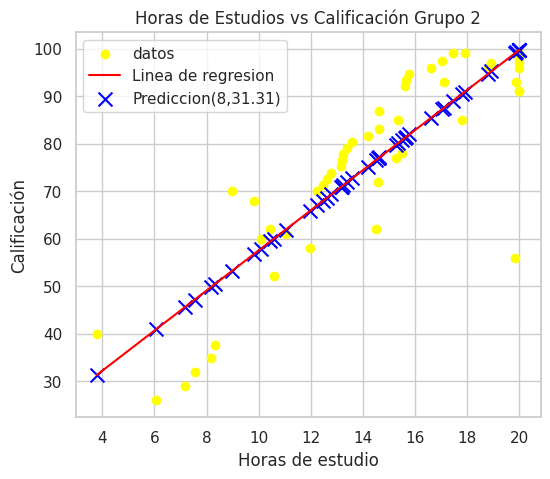

In [76]:
print("Valor de la pendiente:", lr.coef_[0])
print("Valor de la intercepcion:", lr.intercept_)

plt.figure(figsize=(6,5))
plt.scatter(x, y, color='yellow', label='datos')
plt.plot(x, lr.predict(x), color='red', label='Linea de regresion')
plt.scatter(x, Ypredict, color='blue', marker='x', s=100,
            label='Prediccion(8,{0:.2f})'.format(Ypredict[0]))
plt.title('Horas de Estudios vs Calificación Grupo 2')
plt.xlabel('Horas de estudio')
plt.ylabel('Calificación')
plt.legend()
plt.grid(True)
plt.show()

*   ### Cálculo de la Correlación:


In [77]:
#coeficiente de correlación Pearson
from scipy.stats import pearsonr
coeficiente_correlacion, p_valor = pearsonr(df2['HorasEstudio'], df2['Calificacion'])

print("Coeficiente de correlacion de Pearson:", coeficiente_correlacion)
print("Valor p:", p_valor)

Coeficiente de correlacion de Pearson: 0.861989042650508
Valor p: 9.077714233687994e-16




---



---


## Interpretación de Resultados del Grupo 2:
Analizar los resultados obtenidos en base al diagrama de dispersión la línea de regresión y el coeficiente de correlación. Contestar las siguientes preguntas


 * **1. ¿Explicar cuál es la interpretación del coeficiente de regresión en términos de la
relación entre el tiempo de estudio y las calificaciones finales?**
> - La línea de regresión muestra una pendiente positiva,con dirección hacia arriba, lo que indica que por cada hora adicional de estudio, las calificaciones aumentan en una cantidad determinada.



* **2. ¿Cómo se interpreta el coeficiente de correlación en términos de la fuerza y
dirección de la relación entre las variables?**


> - Dado que la tendencia de la línea de regresión es hacia arriba y los puntos siguen una distribución alineada con esta línea, el coeficiente de correlación es positivo y muestra una relación fuerte. Esto quiere decir  que los estudiantes que dedican más horas al estudio tienden a obtener mejores calificaciones con consistencia.






* **3. ¿El modelo de regresión lineal es estadísticamente significativo?**


>  -Sí, el modelo es altamente y estadísticamente significativo.






* **4. ¿Qué tan confiable es el modelo de regresión para predecir las
calificaciones finales de los estudiantes basado en el tiempo de estudio?**

> - La amplitud de la banda de confianza alrededor de la línea de regresión indica el grado de precisión de las predicciones. En este modelo se puede visualizar que los puntos no están tan dispersos y son muy cercanos a la linea esto quiere decir que el modelo es confiable.



---



---






---



### **GRUPO 3**






*   ### Carga y Exploración de Datos:




In [78]:
# Cargar los datos del grupo 3
df3 = pd.read_csv('grupo3.csv')
df3.head()

,HorasEstudio,Calificacion
0,3.79,15.0
1,6.08,26.1
2,7.17,29.0
3,7.54,31.9
4,8.18,34.8


In [79]:
#Exploración inicial de los datos (descripción estadística)
df3.describe()

,HorasEstudio,Calificacion
count,50.000000,50.000000
mean,14.352000,75.968000
std,4.219174,23.668867
min,3.790000,15.000000
25%,12.032500,61.000000
50%,14.600000,84.950000
75%,17.715000,94.375000
max,20.000000,99.000000


In [80]:
#Información del DataFrame del Grupo 3:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HorasEstudio  50 non-null     float64
 1   Calificacion  50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes


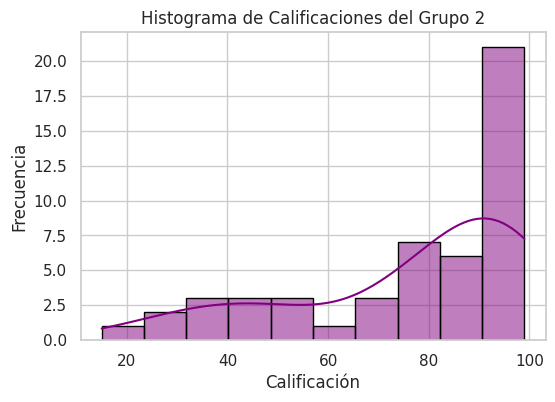

In [81]:
# Histograma Grupo 2
plt.figure(figsize=(6, 4))
sns.histplot(df3['Calificacion'], bins=10, kde=True, color='purple',edgecolor='black')
plt.title('Histograma de Calificaciones del Grupo 2')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


*   ### Modelo de Regresión Lineal:




In [82]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
lr=LinearRegression()

In [83]:
#Variables independientes o variables predictoras
x = df3[["HorasEstudio"]]

#Variable dependiente o variable objetivo a predecir
y=df3["Calificacion"]
x.head(6)

,HorasEstudio
0,3.79
1,6.08
2,7.17
3,7.54
4,8.18
5,8.32


In [84]:
#Entrenar al algoritmo de regresion lineal
lr.fit(x,y)

LinearRegression()

In [85]:
#Realizamos la fase de predicción
Ypredict=lr.predict(x)

In [86]:
 # Valor del intercepto
intercepto =lr.intercept_

In [87]:
# Valor del coeficiente (pendiente de la recta)
pendiente =lr.coef_

In [88]:
print("Modelo de Regresión Lineal:")
print(f"Intercepto (b):", intercepto)
print(f"Pendiente (m): ",pendiente)
print(f"Ecuación de la línea de regresión: Calificacion = ",intercepto ,"+", pendiente," * HorasEstudio")

Modelo de Regresión Lineal:
Intercepto (b): 0.10805051830283219
Pendiente (m):  [5.28567095]
Ecuación de la línea de regresión: Calificacion =  0.10805051830283219 + [5.28567095]  * HorasEstudio


In [89]:
#Coeficiente de determinación R²
lr.score(x,y)

0.8877693591293075

*   ### Visualización de Resultados:

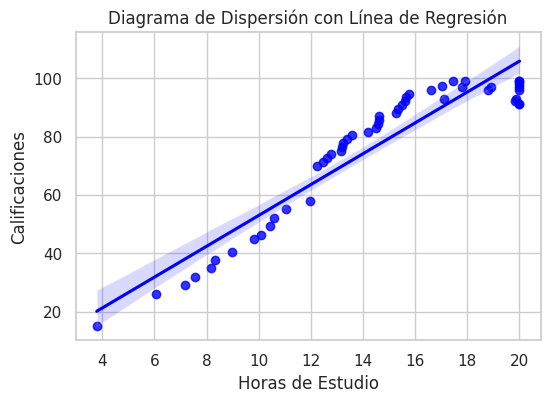

In [90]:
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.regplot(x=x, y=y, scatter=True, color='blue')
plt.title('Diagrama de Dispersión con Línea de Regresión')
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificaciones')
plt.grid(True)
plt.show()                                   # Mostrar gráfica

Valor de la pendiente: 5.285670950508442
Valor de la intercepcion: 0.10805051830283219


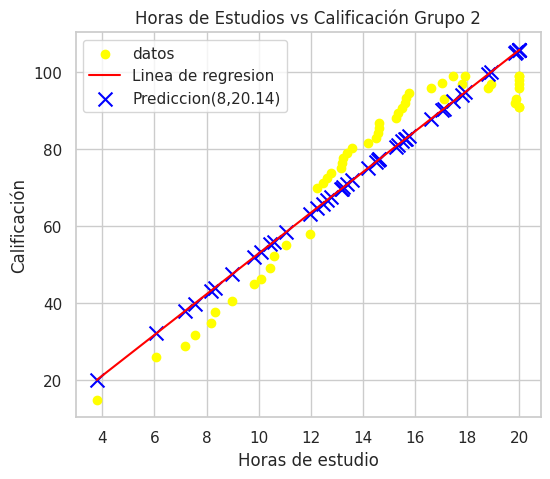

In [91]:
print("Valor de la pendiente:", lr.coef_[0])
print("Valor de la intercepcion:", lr.intercept_)

plt.figure(figsize=(6,5))
plt.scatter(x, y, color='yellow', label='datos')
plt.plot(x, lr.predict(x), color='red', label='Linea de regresion')
plt.scatter(x, Ypredict, color='blue', marker='x', s=100,
            label='Prediccion(8,{0:.2f})'.format(Ypredict[0]))
plt.title('Horas de Estudios vs Calificación Grupo 2')
plt.xlabel('Horas de estudio')
plt.ylabel('Calificación')
plt.legend()
plt.grid(True)
plt.show()

*   ### Cálculo de la Correlación:


In [92]:
#coeficiente de correlación Pearson
from scipy.stats import pearsonr
coeficiente_correlacion, p_valor = pearsonr(df2['HorasEstudio'], df2['Calificacion'])

print("Coeficiente de correlacion de Pearson:", coeficiente_correlacion)
print("Valor p:", p_valor)

Coeficiente de correlacion de Pearson: 0.861989042650508
Valor p: 9.077714233687994e-16




---



---


## Interpretación de Resultados del Grupo 3:
Analizar los resultados obtenidos en base al diagrama de dispersión la línea de regresión y el coeficiente de correlación. Contestar las siguientes preguntas


 * **1. ¿Explicar cuál es la interpretación del coeficiente de regresión en términos de la
relación entre el tiempo de estudio y las calificaciones finales?**
> - La línea de regresión muestra una pendiente positiva,con dirección hacia arriba, lo que indica que por cada hora adicional de estudio, las calificaciones aumentan en una cantidad determinada.



* **2. ¿Cómo se interpreta el coeficiente de correlación en términos de la fuerza y
dirección de la relación entre las variables?**


> - El coeficiente que se muestra en la gráfica  es positivo y alto esto significa que a medida que aumenta el tiempo de estudio, las calificaciones también tienden a mejorar, lo que confirma que existe una relación significativa entre ambas variables.






* **3. ¿El modelo de regresión lineal es estadísticamente significativo?**


>  - Según los calculos realizamos el valor de p es bajo lo que indica que el modelo es realmente significativo.






* **4. ¿Qué tan confiable es el modelo de regresión para predecir las
calificaciones finales de los estudiantes basado en el tiempo de estudio?**

> -  En este modelo se puede visualizar que los puntos no están tan dispersos y son muy cercanos a la linea esto quiere decir que el modelo es mas confiable que el anterior para realizar las predicciones.



---



---




### **CONCLUSIONES GENERALES.**
Si bien los datos confirman que el esfuerzo y la dedicación están correlacionados con mejores calificaciones, este estudio nos recuerda que el aprendizaje efectivo no se trata solo de cantidad de estudio, sino también de calidad.

Se puede analizar que en el grupo 1 se muestra una pendiente que tiende a disminur negativamente,esto quiere decir que no existe una relación clara entre el tiempo de estudio y las calificaciones por lo tanto la relación es débil y no tan confiable.

En el grupo 2 se puede observar  que la tendencia de la línea de regresión es hacia arriba y muestra una relación fuerte y asimismo es mas confiable que el grupo anterior.

Y por último en el grupo 3 los puntos no están menos dispersos como se puede visualizar en el grupo 2 y 3 además de que son muy cercanos a la línea esto quiere decir que el modelo es confiable para realizar las predicciones.

Este análisis no solo aporta evidencia matemática sobre la importancia del tiempo de estudio, sino que también nos invita a reflexionar sobre la naturaleza del aprendizaje. No todos los estudiantes aprenden al mismo ritmo, y el número de horas dedicadas al estudio no siempre garantiza el éxito académico. Factores como la motivación, el método de enseñanza y la capacidad de concentración juegan un papel clave en el proceso de aprendizaje.